In [1]:
# Load libraries
import pandas as pd
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import train_test_split function
from sklearn.model_selection import train_test_split 
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [6]:
col_names = ['STEP', 'LAPV', 'MLOG', 'TENG', 'IMG_PATH']
# load dataset
album = pd.read_csv("album/album.csv", header=0, names=col_names)
album.head(10)

,STEP,LAPV,MLOG,TENG,IMG_PATH
0,1,916.935723,255,13302.166275,/home/pi/arducam/album/IMG_1585936966.png
1,2,911.034840,255,13264.475096,/home/pi/arducam/album/IMG_1585936968.png
2,3,907.401068,255,13276.739900,/home/pi/arducam/album/IMG_1585936970.png
3,4,403.205945,255,11248.518264,/home/pi/arducam/album/IMG_1585936972.png
4,5,171.948095,255,7867.107520,/home/pi/arducam/album/IMG_1585936974.png
5,6,85.064403,196,5992.695534,/home/pi/arducam/album/IMG_1585936976.png
6,7,40.946184,111,4746.584274,/home/pi/arducam/album/IMG_1585936977.png
7,8,28.359933,74,4127.022328,/home/pi/arducam/album/IMG_1585936979.png
8,9,25.211735,72,3865.296515,/home/pi/arducam/album/IMG_1585936981.png
9,10,25.300517,70,3860.458143,/home/pi/arducam/album/IMG_1585936983.png


In [11]:
#split dataset in features and target variable
feature_cols = ['LAPV', 'TENG']
X = album[feature_cols] # Features
y = album.STEP # Target variable

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1836734693877551


In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1', '2', '3','4', '5', '6','7', '8', '9', '10'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('album.png')

True

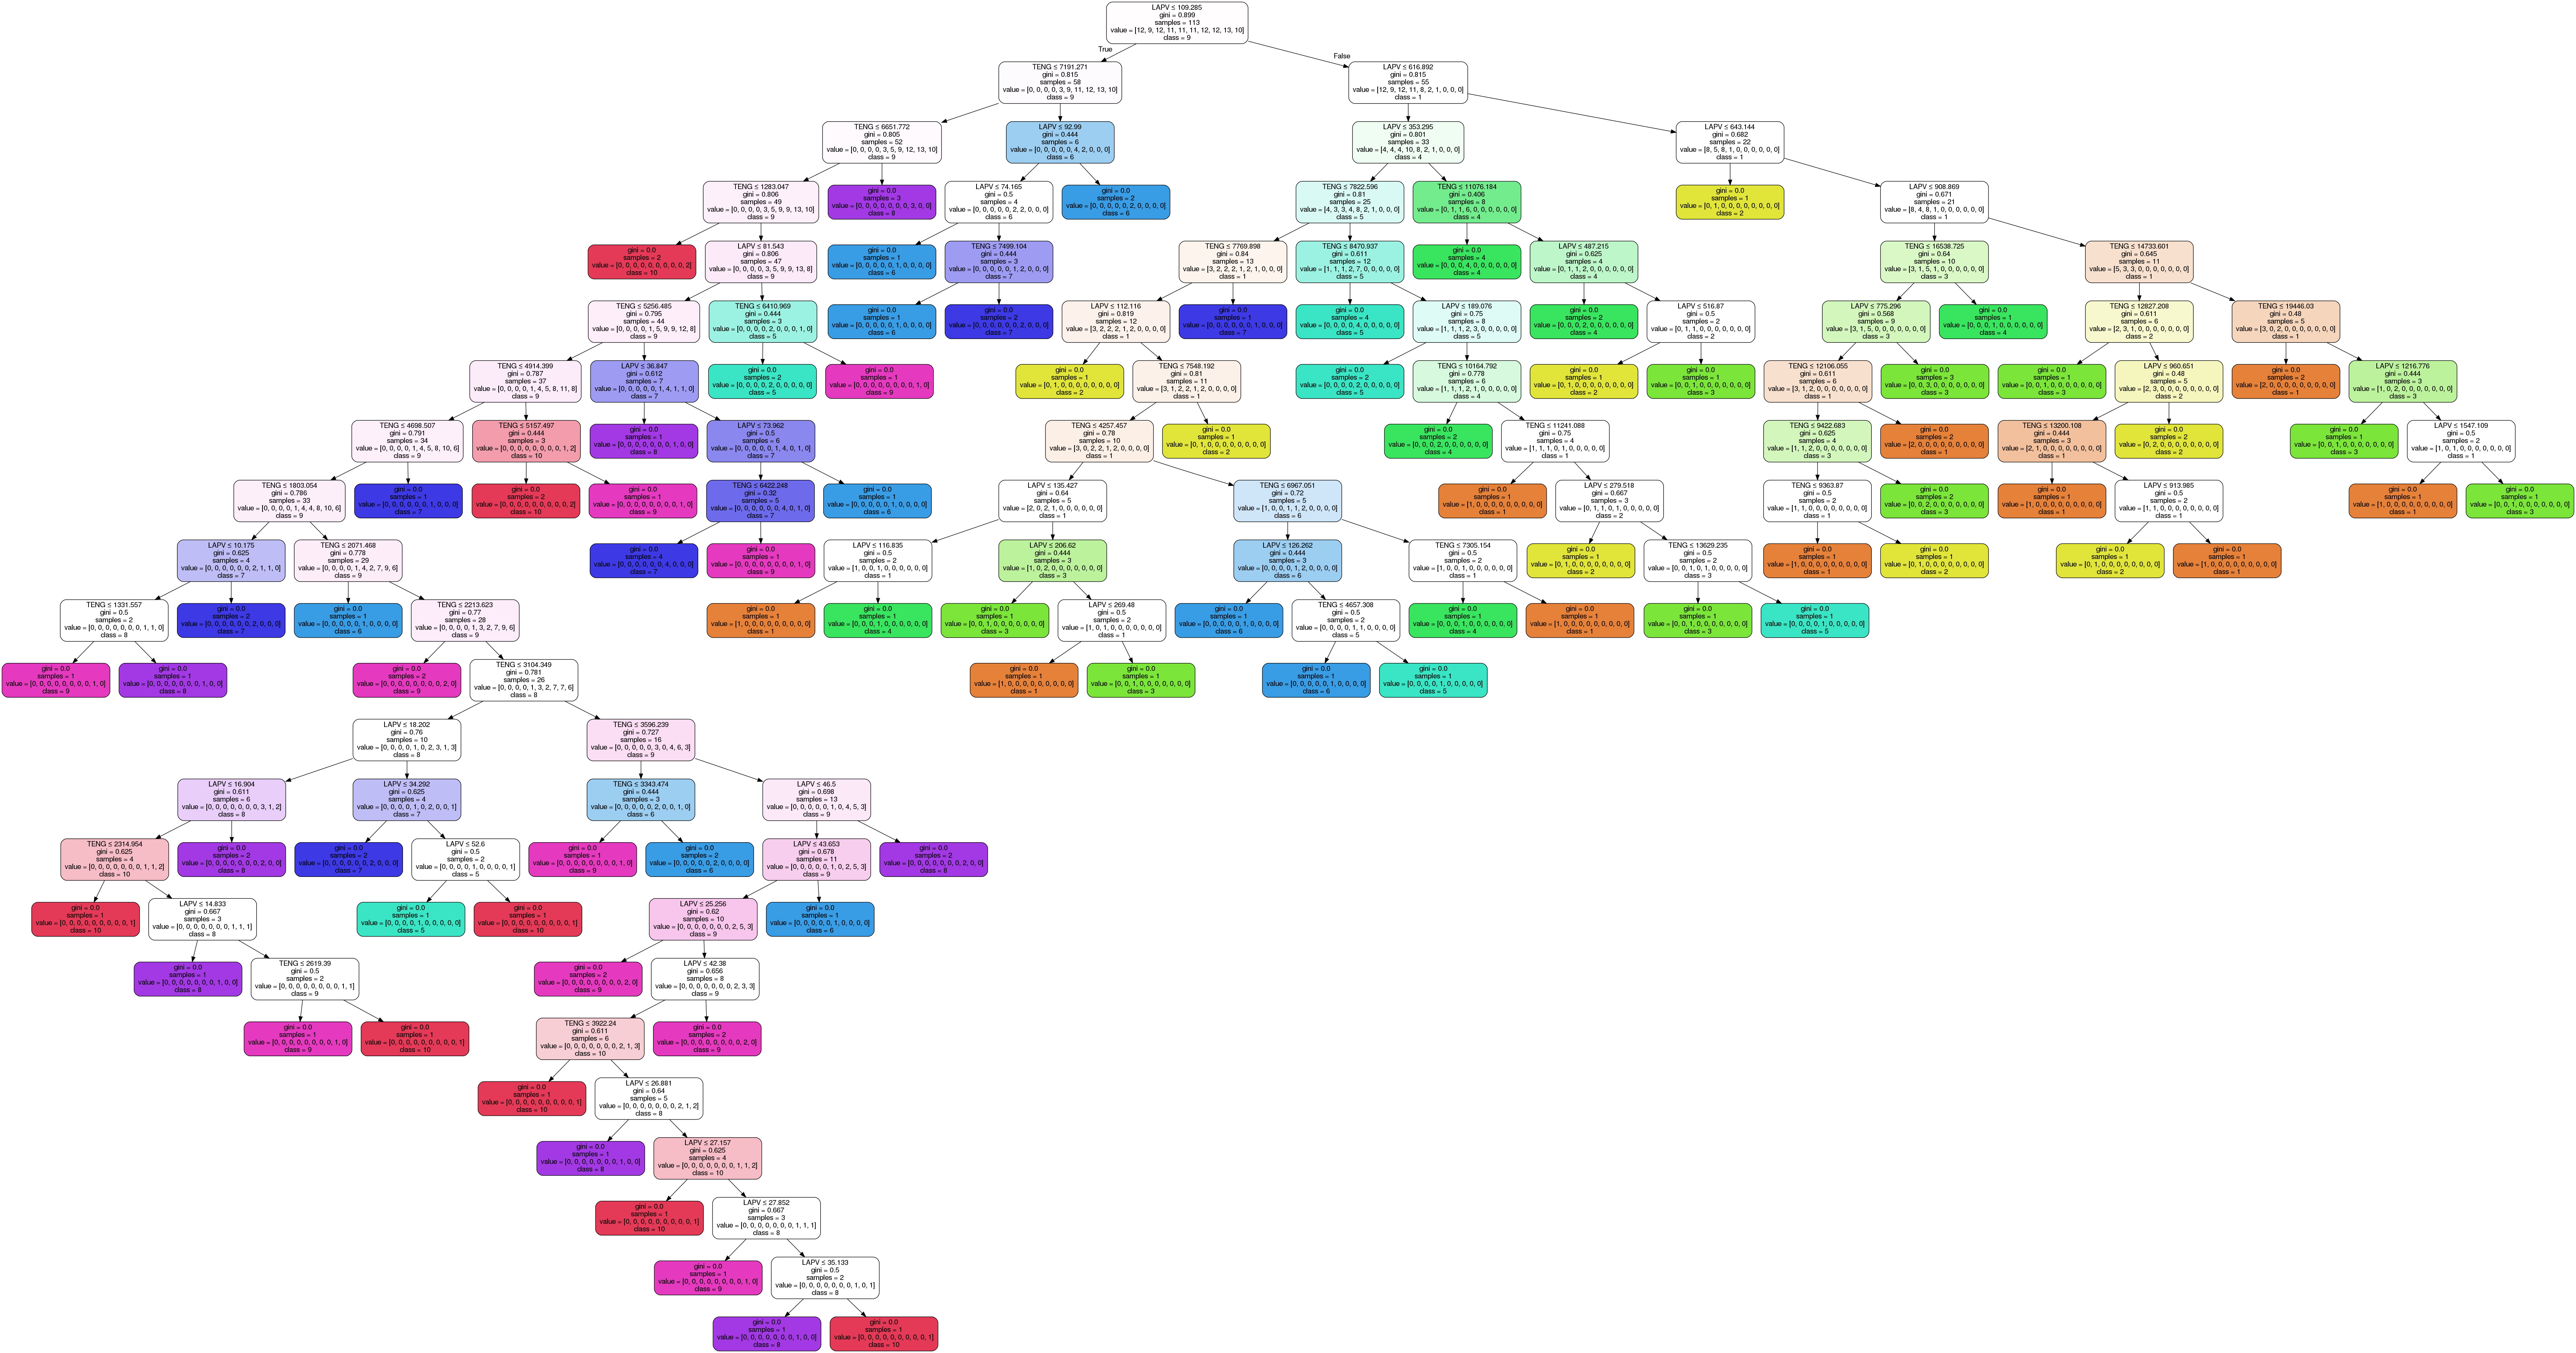

In [18]:
Image(graph.create_png())